Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

Problem Statement: a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset available below

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Using the info method we can see that there are and 16 columns that have FLOAT TYPE AND 6 object data type.We will try to separate these columnsfor easier analysis purpose.

In [6]:
pd.DataFrame({"Null":df.isnull().sum()/df.shape[0]*100}).sort_values("Null",ascending=False)

,Null
Sunshine,47.406528
Evaporation,41.685460
Cloud3pm,29.139466
Cloud9am,28.735905
Pressure3pm,15.572700
Pressure9am,15.537092
WindGustDir,11.762611
WindGustSpeed,11.762611
WindDir9am,9.839763
WindDir3pm,3.655786


CHECK NULL VALUES

In [7]:
df.duplicated().sum()

1663

Drop duplicate data

TARGET

,RainTomorrow
No,0.735312
Yes,0.236320
NaN,0.028368


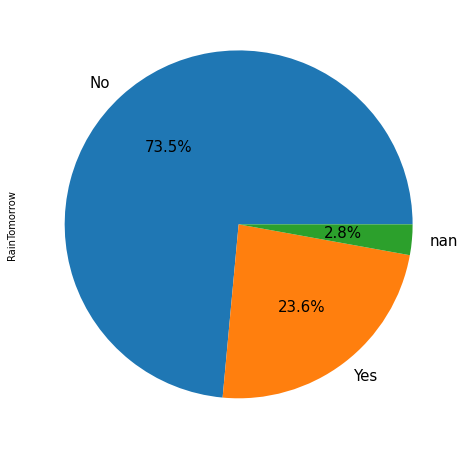

In [8]:
df.RainTomorrow.value_counts(dropna=False).plot(kind="pie",autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False,normalize=True).to_frame()

In [9]:
df.dropna(subset=["RainTomorrow"],inplace=True)

In [10]:
rain = {"Yes":1,"No":0}

df.RainTomorrow = df.RainTomorrow.replace(rain).astype("int")

,RainTomorrow
0,0.75678
1,0.24322


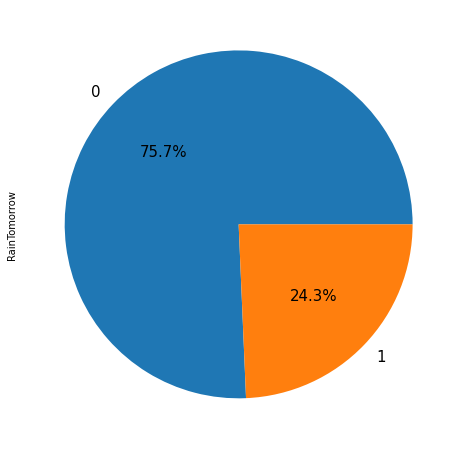

In [11]:
df.RainTomorrow.value_counts(dropna=False).plot(kind="pie",autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainTomorrow.value_counts(dropna=False,normalize=True).to_frame()

UNIVARIANTE ANALYSIS

In [12]:
cater = df.select_dtypes("object").columns
number = df.select_dtypes("number").columns

Categorical feature

In [13]:
df[cater].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,8186,8186,7233,7377,7900,8079
unique,2966,12,16,16,16,2
top,2011-05-09,Melbourne,N,N,SE,No
freq,5,1502,689,869,797,6120


DATE

In [14]:
df["Date"]= pd.to_datetime(df.Date)

In [15]:
date = df.Date.dt.strftime("%Y-%m")

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'RainTomorrow')

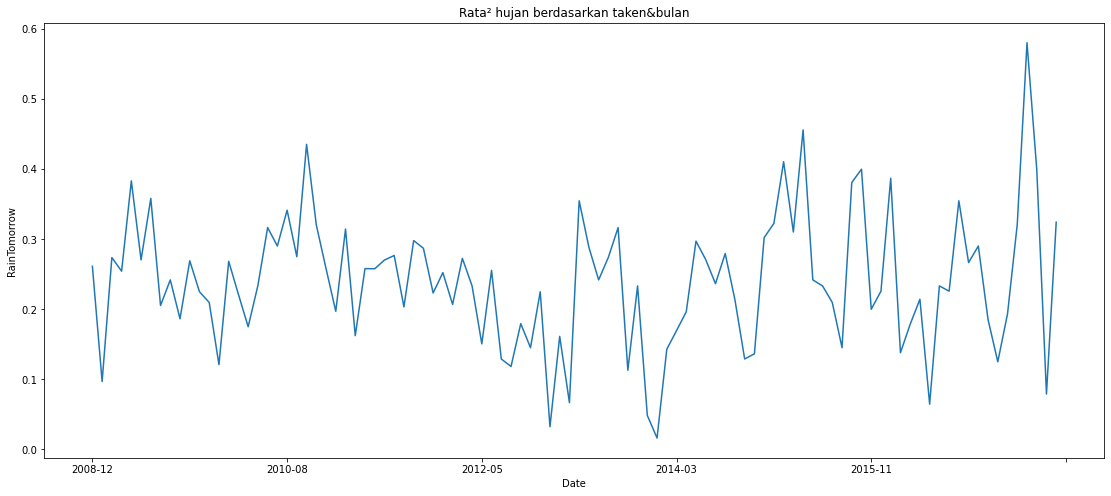

In [17]:
df.groupby(date)["RainTomorrow"].mean().plot(figsize=(19,8))
plt.title("Rata² hujan berdasarkan taken&bulan")
plt.xlabel("Date")
plt.ylabel("RainTomorrow")

Extract year to date

In [18]:
year = df.Date.dt.year

In [19]:
year.value_counts().sort_index().to_frame()

,Date
2008,88
2009,1234
2010,1436
2011,1356
2012,892
2013,543
2014,945
2015,632
2016,670
2017,390


Visualization

Text(0.5, 0, 'Years')

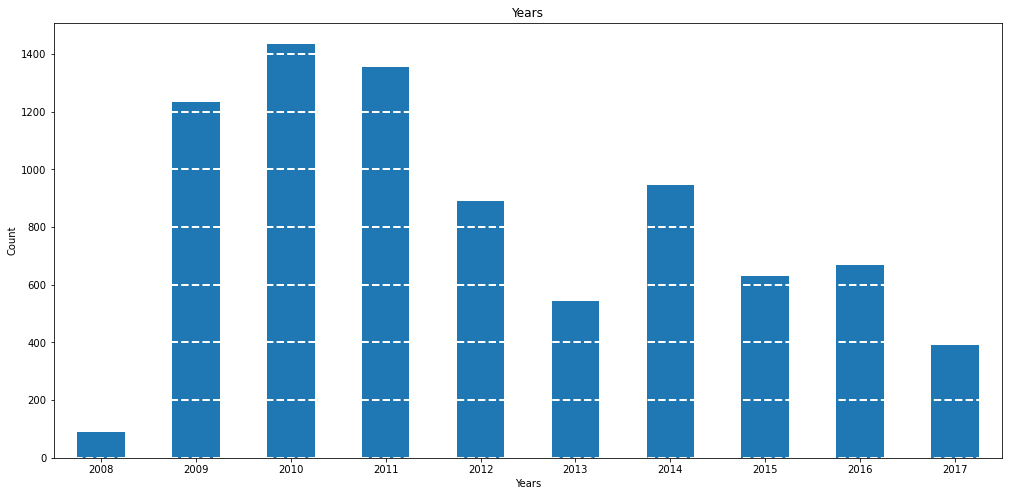

In [20]:
year.value_counts().sort_index().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Years")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("Years")

In [21]:
df.groupby(year)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
2008,0.261364
2009,0.253647
2010,0.270891
2011,0.246313
2012,0.197309
2013,0.200737
2014,0.206349
2015,0.281646
2016,0.229851


Text(0.5, 0, 'Years')

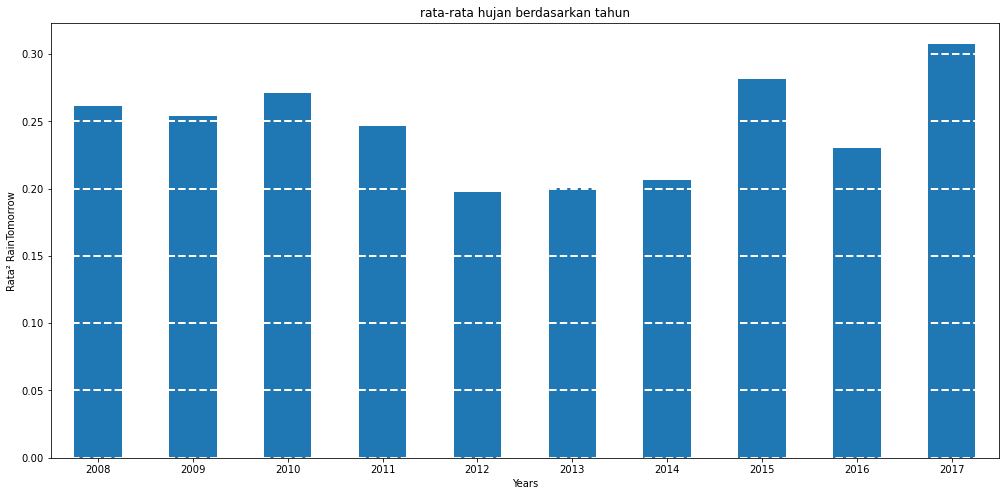

In [22]:
df.groupby(year)["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan tahun")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("Years")

In [23]:
df["Years"] = df.Date.dt.year.astype("object")

In [24]:
df.query("Years == 2007")["RainTomorrow"].value_counts().to_frame()

,RainTomorrow


In [25]:
df.Years.describe()

count     8186
unique      10
top       2010
freq      1436
Name: Years, dtype: int64

In [26]:
bins = [2007,2010,2017]
year_bin = pd.cut(df.Years,bins=bins)

In [27]:
year_bin.value_counts()

(2010, 2017]    5428
(2007, 2010]    2758
Name: Years, dtype: int64

In [28]:
df.groupby(year_bin)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Years,
"(2007, 2010]",0.262872
"(2010, 2017]",0.233235


In [29]:
months = df.Date.dt.month.astype("object")

In [30]:
months.describe()

count     8186
unique      12
top          6
freq       800
Name: Date, dtype: int64

In [31]:
months.value_counts().sort_index().to_frame()

,Date
1,740
2,600
3,744
4,589
5,799
6,800
7,719
8,669
9,605
10,631


Text(0.5, 0, 'Months')

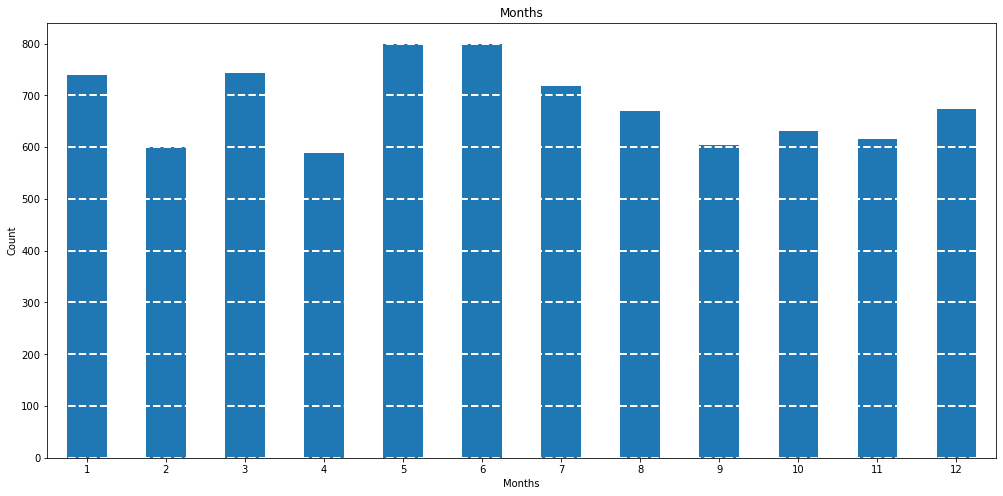

In [32]:
months.value_counts().sort_index().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Months")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("Months")

In [33]:
df.groupby(months)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
1,0.183784
2,0.266667
3,0.247312
4,0.276740
5,0.217772
6,0.287500
7,0.229485
8,0.258595
9,0.238017


Text(0.5, 0, 'Months')

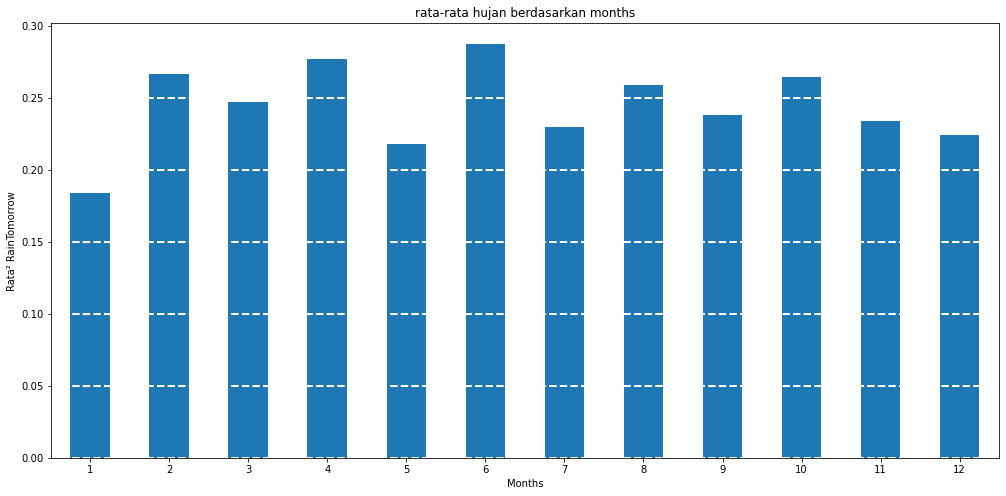

In [34]:
df.groupby(months)["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan months")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("Months")

In [35]:
df["Months"] = df.Date.dt.month.astype("object")

In [36]:
tgl = df.Date.dt.day.astype("object")

In [37]:
tgl.describe()

count     8186
unique      31
top         20
freq       279
Name: Date, dtype: int64

In [38]:
tgl.value_counts().sort_index()

1     266
2     270
3     270
4     265
5     264
6     269
7     269
8     269
9     270
10    268
11    266
12    263
13    269
14    266
15    271
16    272
17    268
18    268
19    270
20    279
21    275
22    270
23    269
24    274
25    273
26    261
27    268
28    268
29    251
30    245
31    160
Name: Date, dtype: int64

In [39]:
df.groupby(tgl)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
1,0.248120
2,0.233333
3,0.292593
4,0.264151
5,0.261364
6,0.249071
7,0.226766
8,0.234201
9,0.281481


In [40]:
df["date"] = df.Date.dt.month.astype("object")

In [41]:
days = df.Date.dt.day_name()

In [42]:
days.describe()

count       8186
unique         7
top       Sunday
freq        1191
Name: Date, dtype: object

In [43]:
days.value_counts().to_frame()

,Date
Sunday,1191
Wednesday,1189
Tuesday,1185
Monday,1184
Thursday,1177
Saturday,1133
Friday,1127


Text(0.5, 0, 'Days')

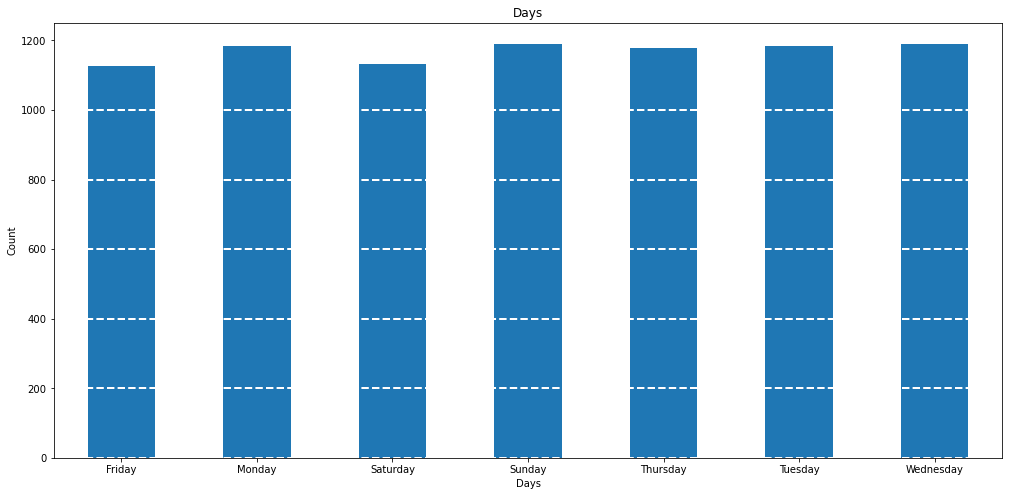

In [44]:
days.value_counts().sort_index().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("Days")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("Days")

In [45]:
df.groupby(days)["RainTomorrow"].mean().to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
Date,
Friday,0.239574
Monday,0.232264
Saturday,0.233892
Sunday,0.249370
Thursday,0.236194
Tuesday,0.261603
Wednesday,0.248949


Text(0.5, 0, 'Days')

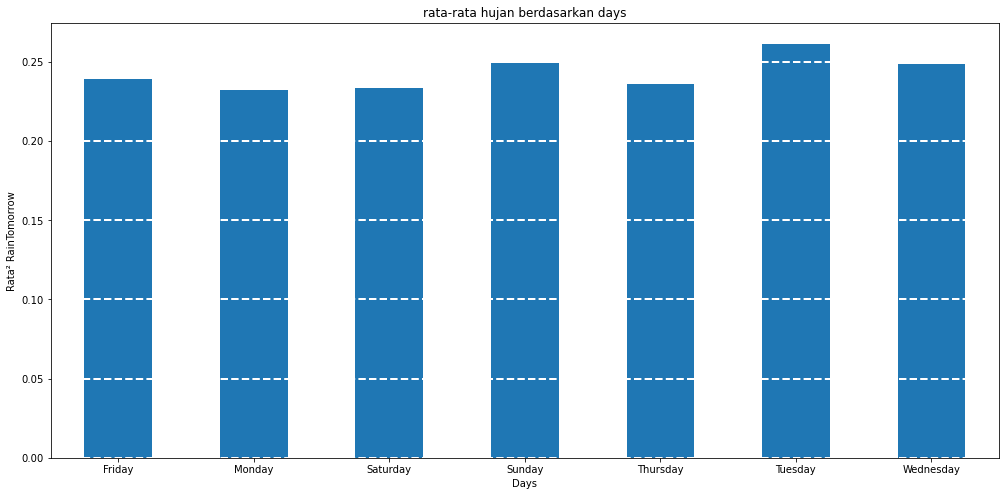

In [46]:
df.groupby(days)["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan days")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("Days")

In [47]:
df["Days"] = df.Date.dt.day_name()

LOCATION

In [48]:
#plt.figure(figsize=(15,15))
#wordcloud = wordcloud(
#    background_color='white',
#    width = 2000,
#    height=1200
#).generate_form_frequencies(df["Location"].value_counts())
#plt.title("Location")
#plt.imshow(wordcloud)
#plt.axis('off')

In [49]:
location = df.groupby("Location")["RainTomorrow"].mean().sort_values(ascending=False).to_frame()

In [50]:
location.head(10)

,RainTomorrow
Location,
CoffsHarbour,0.304918
Melbourne,0.270306
Wollongong,0.269231
Williamtown,0.265165
Newcastle,0.245050
Penrith,0.242171
Brisbane,0.235192
Adelaide,0.223881
Albury,0.221604


In [51]:
location.tail(10)

,RainTomorrow
Location,
Wollongong,0.269231
Williamtown,0.265165
Newcastle,0.245050
Penrith,0.242171
Brisbane,0.235192
Adelaide,0.223881
Albury,0.221604
PerthAirport,0.200997
Darwin,0.128000


WindGustDir WindDir9am WindDir3pm

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

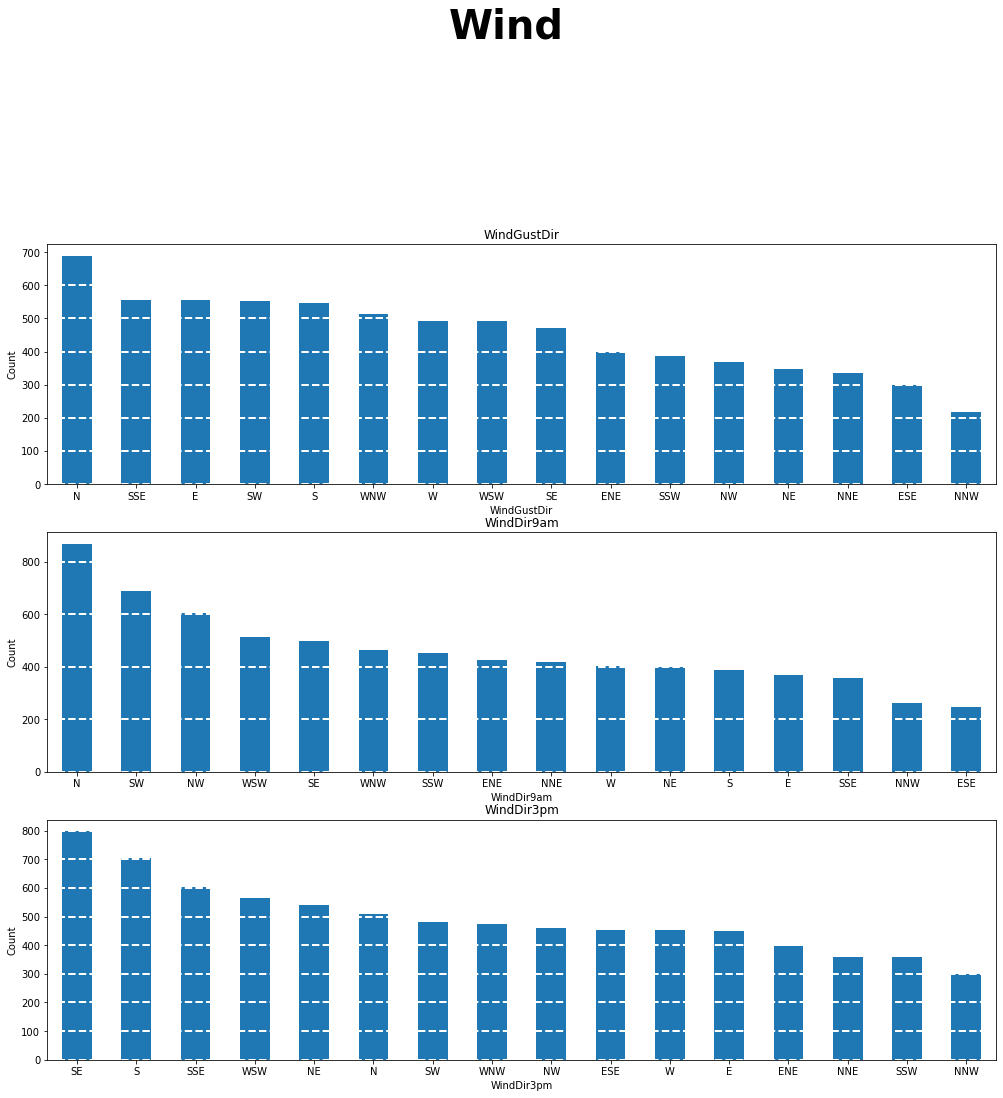

In [53]:
plt.subplot(311)
df.WindGustDir.value_counts().plot(kind="bar",figsize=(17,15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("WindGustDir")

plt.subplot(312)
df.WindDir9am.value_counts().plot(kind="bar",figsize=(17,15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("WindDir9am")

plt.subplot(313)
df.WindDir3pm.value_counts().plot(kind="bar",figsize=(17,15))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xlabel("WindDir3pm")

plt.suptitle("Wind",y=1.1,size=40,fontweight="bold")
plt.tight_layout

In [54]:
df.groupby("WindGustDir")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindGustDir,
NNW,0.292237
SSW,0.291237
N,0.287373
WSW,0.281947
NW,0.275676
SW,0.274368
S,0.268739
NNE,0.264095
WNW,0.262646


In [55]:
df.groupby("WindDir9am")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindDir9am,
N,0.342923
WNW,0.291845
SW,0.287373
W,0.277228
NNE,0.273810
NNW,0.272727
SSW,0.256071
ESE,0.250000
WSW,0.240777


In [56]:
df.groupby("WindDir3pm")["RainTomorrow"].mean().sort_values(ascending=False).to_frame().style.bar(subset="RainTomorrow",color="red")

,RainTomorrow
WindDir3pm,
SSW,0.362117
NNW,0.361204
N,0.280943
NW,0.275488
S,0.254623
WSW,0.245115
SW,0.236515
NNE,0.231198
SE,0.225847


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

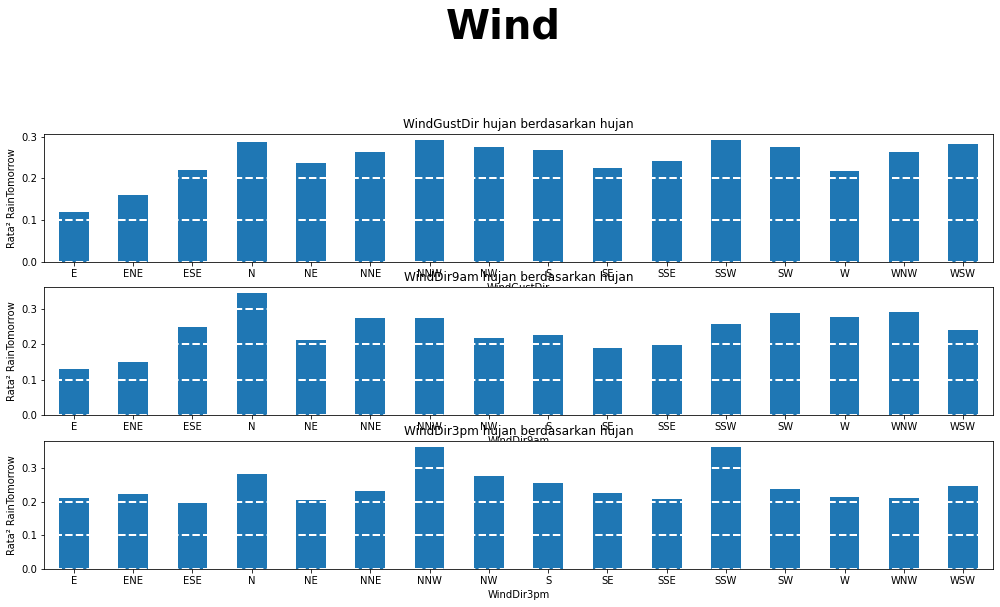

In [57]:
plt.subplot(311)
df.groupby("WindGustDir")["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindGustDir hujan berdasarkan hujan")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("WindGustDir")

plt.subplot(312)
df.groupby("WindDir9am")["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir9am hujan berdasarkan hujan")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("WindDir9am")

plt.subplot(313)
df.groupby("WindDir3pm")["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("WindDir3pm hujan berdasarkan hujan")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("WindDir3pm")

plt.suptitle("Wind",y=1.1,size=40,fontweight="bold")
plt.tight_layout

In [58]:
df.groupby(["Years","Months"])["WindGustDir"].describe()["top"].to_frame().sample(20)

top
Years Months     
2009  8       NNE
2015  3       SSE
2011  1         S
2016  11      SSE
      3         E
2009  10      SSE
      4         S
2014  7         N
2009  2        SE
2008  12       NE
2009  7       NNW
2011  12      SSE
2013  3         E
2014  12      WSW
2011  5       WSW
      10        E
2015  5       NNW
2011  9         N
2009  11        N
2016  1        SE

RAIN TODAY

In [59]:
df["RainToday"].fillna("No",inplace=True)

,RainToday
No,0.760689
Yes,0.239311


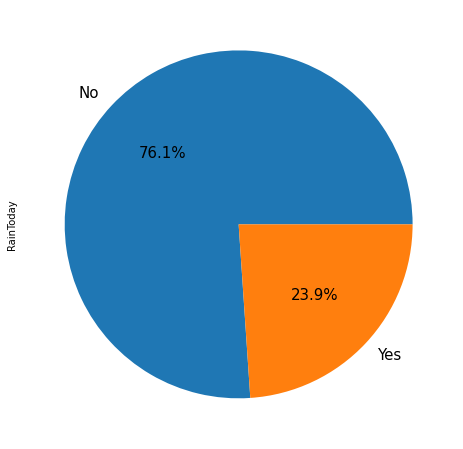

In [60]:
df.RainToday.value_counts(dropna=False).plot(kind="pie",autopct="%1.1f%%",fontsize=15,figsize=(17,8))
df.RainToday.value_counts(dropna=False,normalize=True).to_frame()

In [61]:
df.groupby("RainToday")["RainTomorrow"].value_counts(normalize=True).to_frame()

RainTomorrow
RainToday RainTomorrow              
No        0                 0.832182
          1                 0.167818
Yes       0                 0.517101
          1                 0.482899

Text(0.5, 0, 'RainToday')

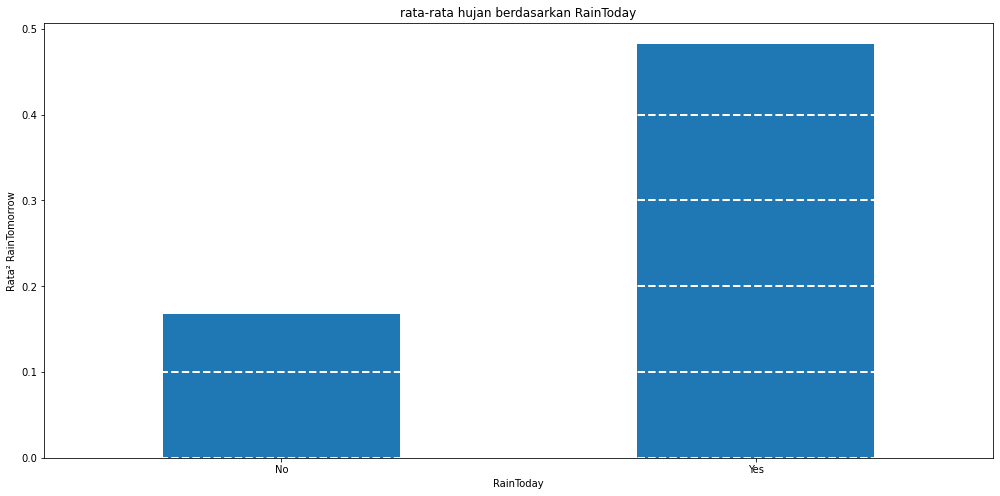

In [62]:
df.groupby("RainToday")["RainTomorrow"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("rata-rata hujan berdasarkan RainToday")
plt.ylabel("Rata² RainTomorrow")
plt.xticks(rotation=0)
plt.xlabel("RainToday")

NUMERICAL FEATURES

In [63]:
df[number].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,8126.000000,8151.000000,8079.000000,4767.000000,4306.000000,7233.000000,8124.000000,8100.000000,8142.000000,8103.000000,6894.000000,6893.000000,5895.000000,5855.000000,8145.000000,8109.000000,8186.000000
mean,13.148794,23.842338,2.802451,5.411852,7.689782,40.040094,13.787051,18.475309,67.741955,51.177465,1017.712460,1015.304845,4.528075,4.483177,17.744948,22.431138,0.243220
std,5.420325,6.119105,10.485324,5.086796,3.882658,14.634052,10.160570,9.784151,16.847098,18.426423,6.833132,6.763003,2.880528,2.731902,5.627218,5.962556,0.429053
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000
25%,9.100000,19.300000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.100000,1010.500000,1.000000,2.000000,13.700000,18.100000,0.000000
50%,13.200000,23.200000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.400000,5.000000,5.000000,17.700000,21.900000,0.000000
75%,17.300000,28.000000,1.000000,7.000000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.900000,7.000000,7.000000,21.900000,26.400000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000


HEAT MAP

Text(0.5, 1.0, 'Correlation')

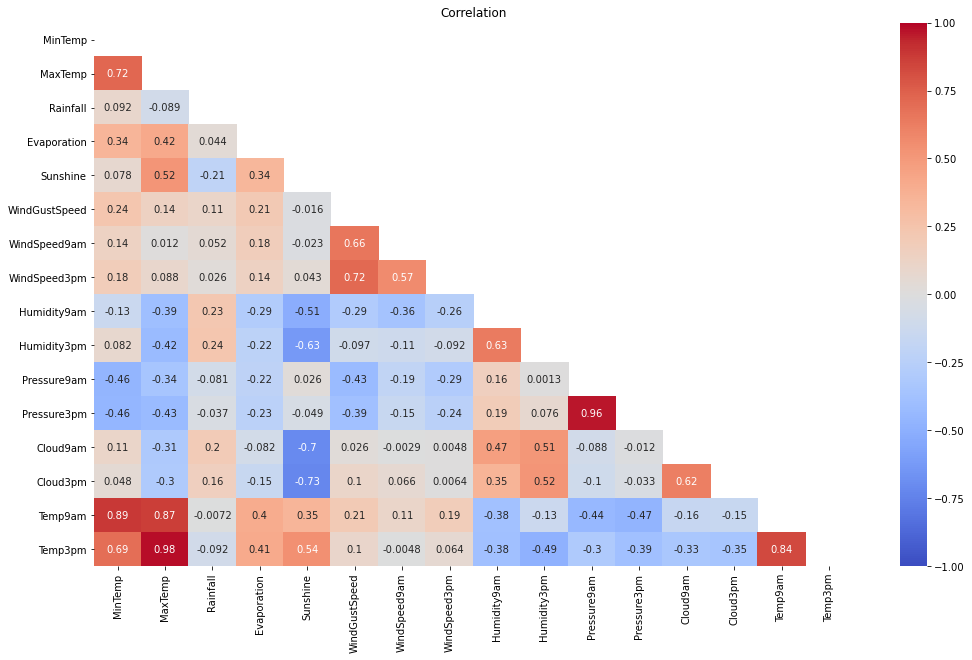

In [64]:
mask = np.triu(df[number].drop("RainTomorrow",axis=1).corr())

plt.figure(figsize=(17,10))
sns.heatmap(df.drop("RainTomorrow",axis=1).corr(),mask=mask,vmin=-1,vmax=1,annot=True,cmap="coolwarm")
plt.title("Correlation")

MinTemp & MaxTemp

MaxTemp skew: 0.39115104253643684
MaxTemp kurt: -0.2369180793435408

MinTemp skew: -0.07283752391612187
MinTemp kurt: -0.5838749983894633


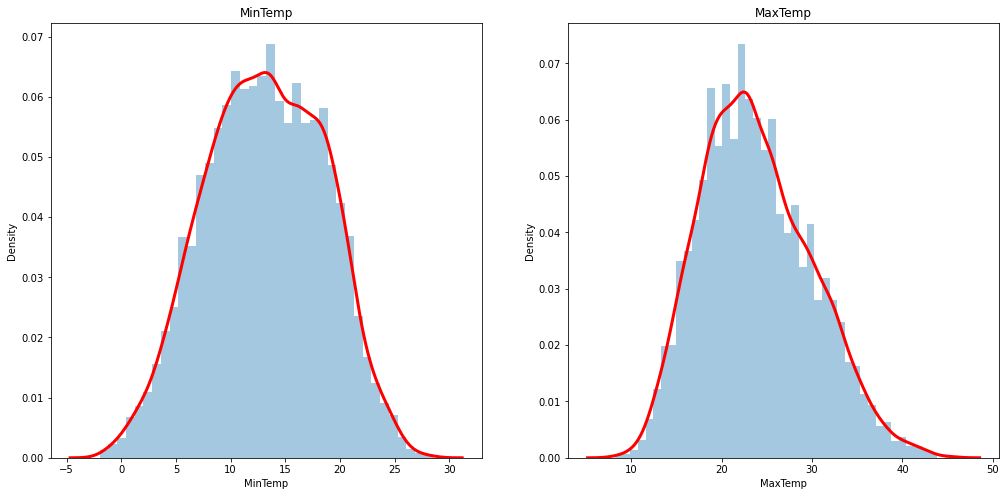

In [65]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.MinTemp,kde_kws={"linewidth":3,"color":"red"})
plt.title("MinTemp")

plt.subplot(122)
sns.distplot(df.MaxTemp,kde_kws={"linewidth":3,"color":"red"})
plt.title("MaxTemp")

print(f"MaxTemp skew: {df.MaxTemp.skew()}")
print(f"MaxTemp kurt: {df.MaxTemp.kurt()}")
print("")
print(f"MinTemp skew: {df.MinTemp.skew()}")
print(f"MinTemp kurt: {df.MinTemp.kurt()}")

Text(0.5, 1.0, 'MaxTemp berdasarkan rain tomorrow')

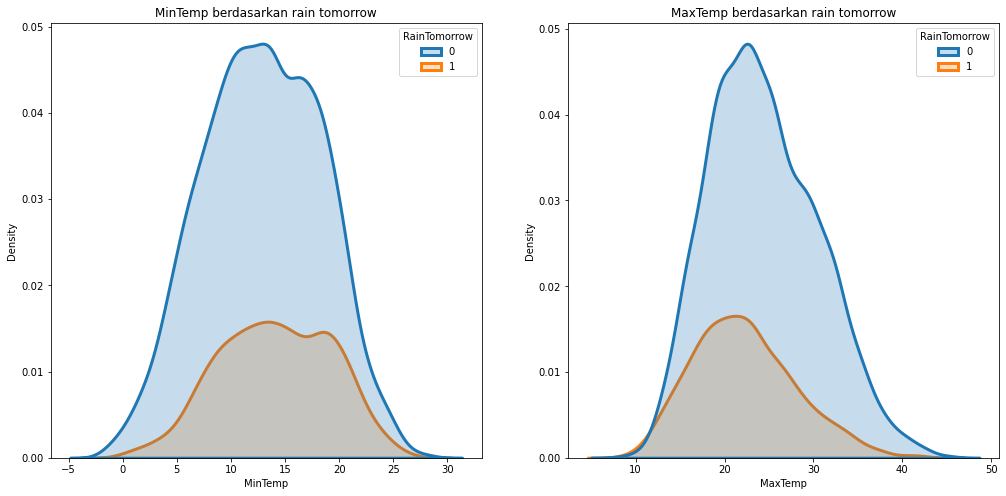

In [66]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.MinTemp,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("MinTemp berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.MaxTemp,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("MaxTemp berdasarkan rain tomorrow")

In [67]:
df.groupby("RainTomorrow")["MinTemp","MaxTemp"].mean()

,MinTemp,MaxTemp
RainTomorrow,,
0,12.843934,24.379257
1,14.102082,22.174509


In [68]:
df["MinTemp"] = df.groupby(["Temp9am"])["MinTemp"].apply(lambda x: x.fillna(x.median())) 
df["MinTemp"].fillna(method="bfill",inplace=True)

In [69]:
df["MaxTemp"] = df.groupby(["Temp3pm"])["MaxTemp"].apply(lambda x: x.fillna(x.median())) 
df["MaxTemp"].fillna(method="bfill",inplace=True)

RAINFALL

Rainfall skew: 13.073755675826087
Rainfall kurt: 304.0197374273296


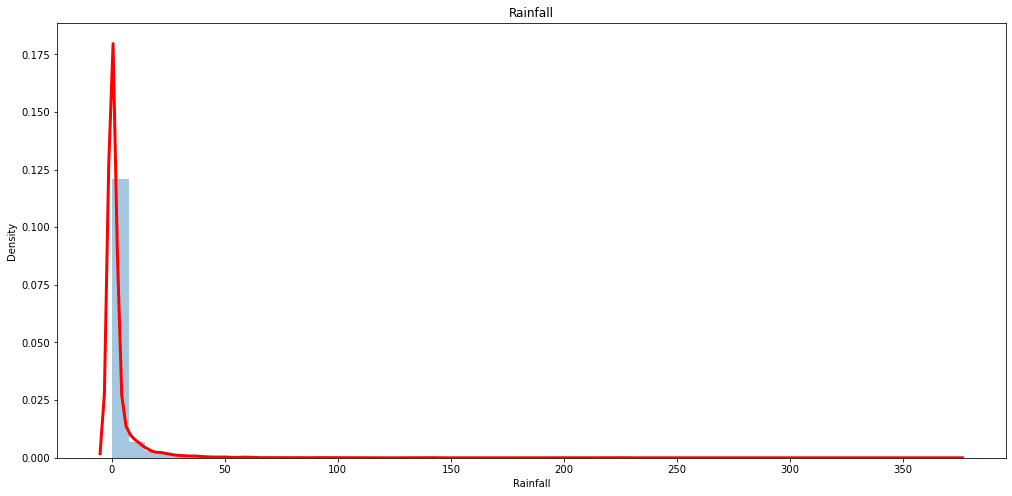

In [70]:
plt.figure(figsize=(17,8))

sns.distplot(df.Rainfall,kde_kws={"linewidth":3,"color":"red"})
plt.title("Rainfall")

print(f"Rainfall skew: {df.Rainfall.skew()}")
print(f"Rainfall kurt: {df.Rainfall.kurt()}")

In [71]:
df.groupby("RainTomorrow")["Rainfall"].mean().to_frame()

,Rainfall
RainTomorrow,
0,1.482453
1,7.025208


In [72]:
df.query("Rainfall > 0")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0,2008,12,12,Monday
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0,2008,12,12,Friday
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,NaN,NaN,20.6,28.9,No,0,2008,12,12,Saturday
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,NaN,NaN,20.1,28.2,Yes,0,2008,12,12,Wednesday
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,8.0,8.0,15.9,17.0,Yes,1,2008,12,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,...,4.0,3.0,29.2,33.1,No,1,2012,11,11,Friday
8378,2012-11-03,Darwin,23.2,33.4,31.6,13.0,6.9,SE,48.0,ESE,...,7.0,2.0,26.0,32.3,Yes,0,2012,11,11,Saturday
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,...,7.0,7.0,29.6,33.4,Yes,0,2012,11,11,Tuesday
8383,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,...,4.0,6.0,29.5,32.0,Yes,0,2012,11,11,Thursday


Text(0.5, 1.0, 'Rainfall berdasarkan rain tomorrow')

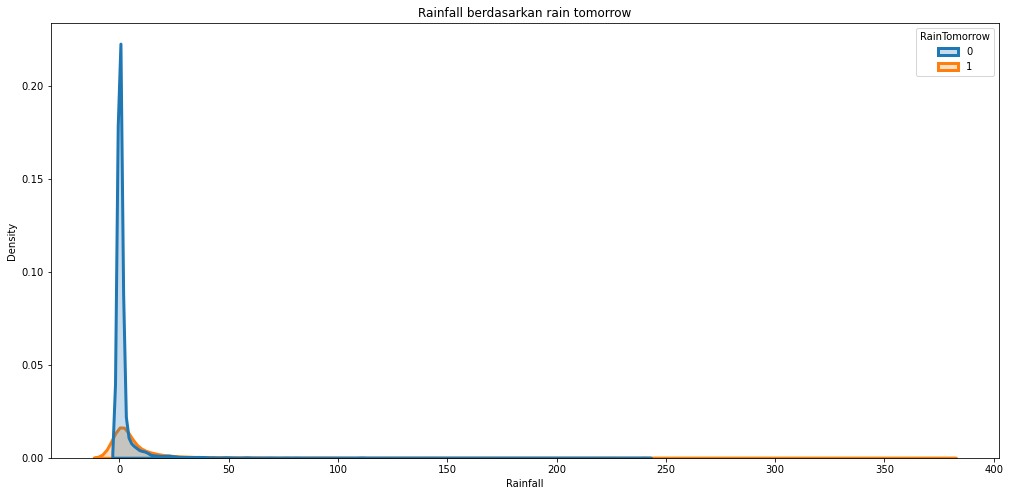

In [73]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Rainfall,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Rainfall berdasarkan rain tomorrow")

In [74]:
df["Rainfall"].fillna(df.Rainfall.median(),inplace=True)

Evaporation

Evaporation skew: 13.151895281926187
Evaporation kurt: 307.6882826185026


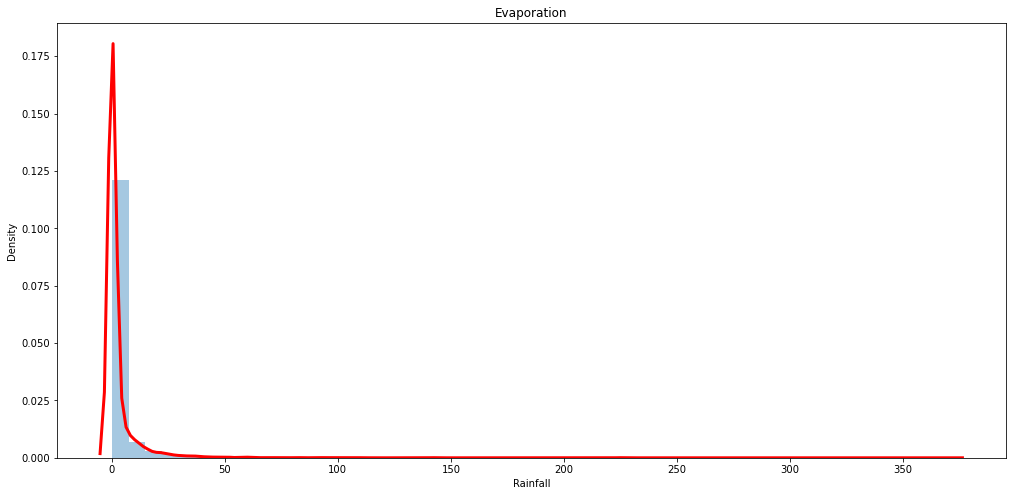

In [75]:
plt.figure(figsize=(17,8))

sns.distplot(df.Rainfall,kde_kws={"linewidth":3,"color":"red"})
plt.title("Evaporation")

print(f"Evaporation skew: {df.Rainfall.skew()}")
print(f"Evaporation kurt: {df.Rainfall.kurt()}")

Text(0.5, 1.0, 'Evaporation berdasarkan rain tomorrow')

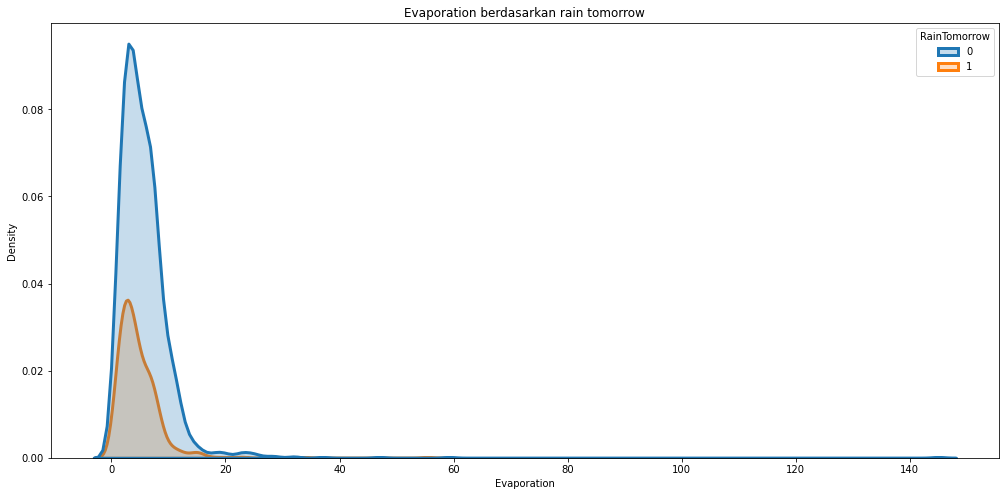

In [76]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Evaporation,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Evaporation berdasarkan rain tomorrow")

Text(0.5, 1.0, 'Evaporation berdasarkan rain tomorrow')

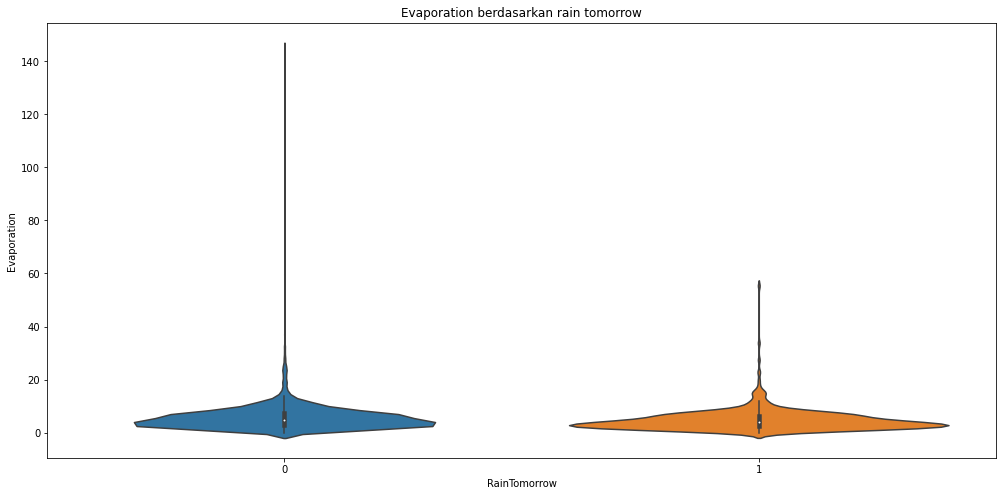

In [77]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Evaporation,x=df.RainTomorrow)
plt.title("Evaporation berdasarkan rain tomorrow")

In [78]:
df.groupby("RainTomorrow")["Evaporation"].mean().to_frame()

,Evaporation
RainTomorrow,
0,5.643070
1,4.674517


In [79]:
df.drop("Evaporation",axis=1,inplace=True)

In [80]:
number = number.to_list()

In [81]:
number.remove("Evaporation")

SUNSHINE

Sunshine skew: -0.5418968793956308
Sunshine kurt: -0.8327531195654219


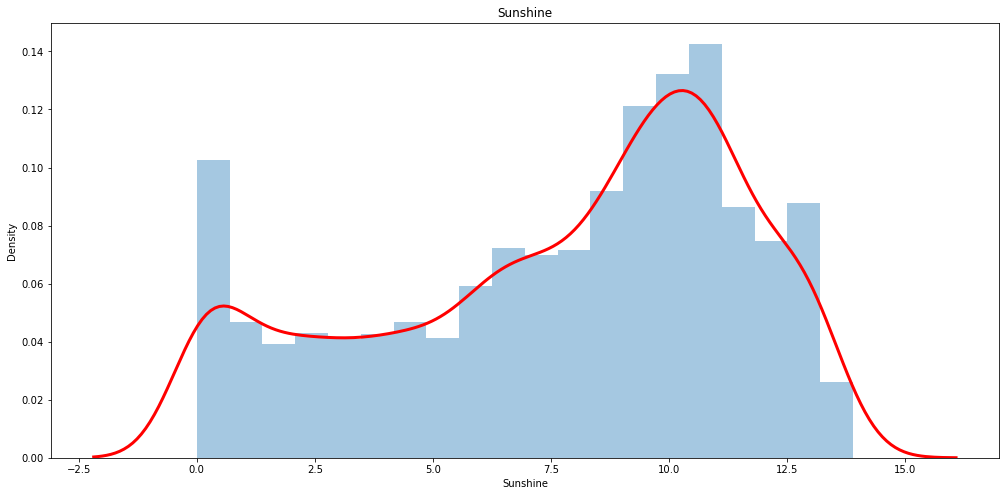

In [82]:
plt.figure(figsize=(17,8))

sns.distplot(df.Sunshine,kde_kws={"linewidth":3,"color":"red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine kurt: {df.Sunshine.kurt()}")

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow')

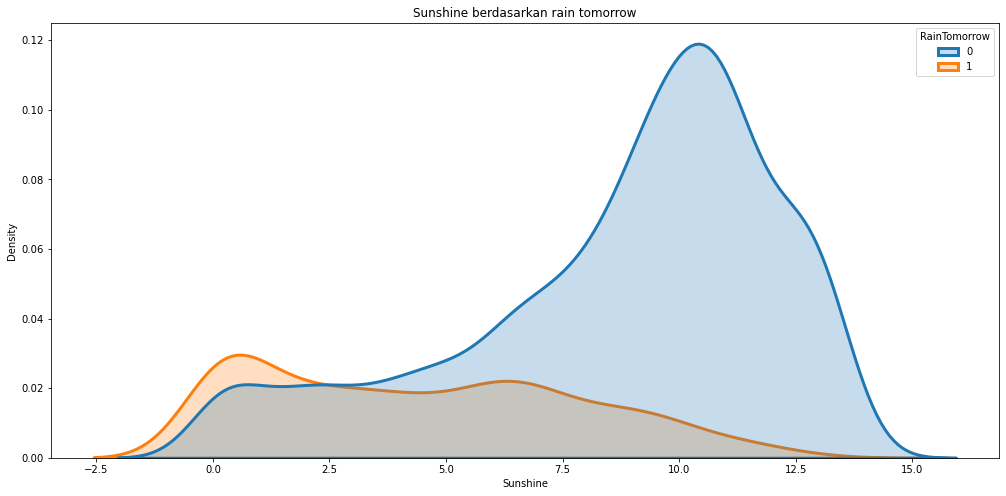

In [83]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.Sunshine,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Sunshine berdasarkan rain tomorrow")

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow')

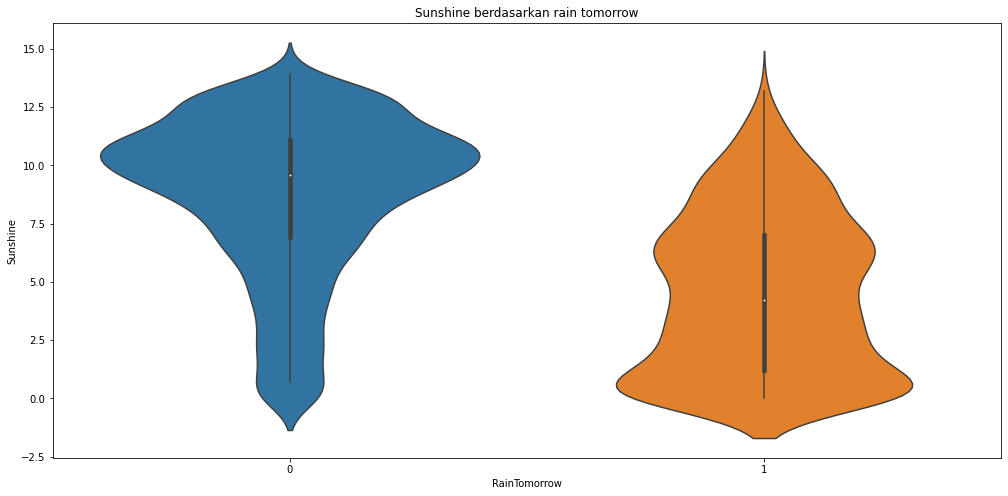

In [84]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine,x=df.RainTomorrow)
plt.title("Sunshine berdasarkan rain tomorrow")

In [85]:
df["Sunshine"] = df.groupby(["Temp3pm"])["Sunshine"].apply(lambda x: x.fillna(x.median())) 
df["Sunshine"].fillna(method="bfill",inplace=True)

Sunshine skew: -0.6405380277575128
Sunshine kurt: -0.4188475755322778


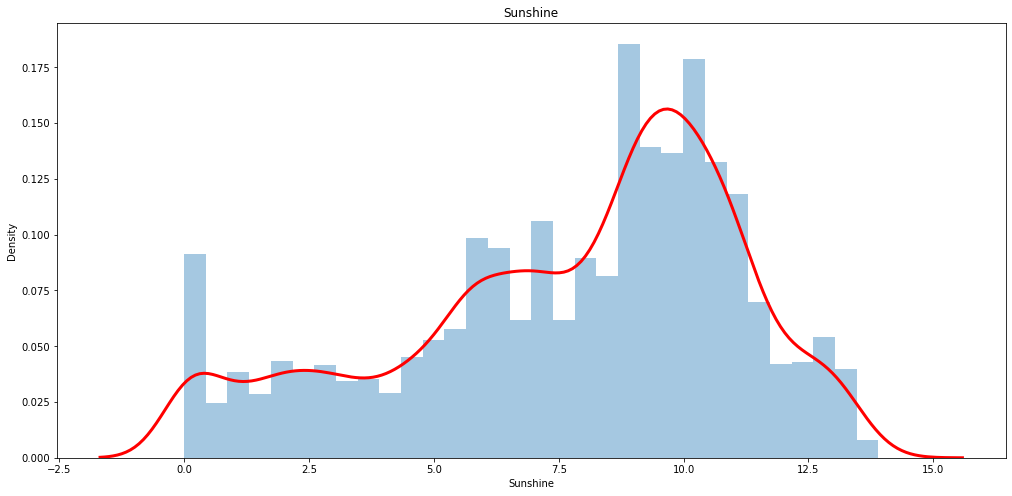

In [86]:
plt.figure(figsize=(17,8))

sns.distplot(df.Sunshine,kde_kws={"linewidth":3,"color":"red"})
plt.title("Sunshine")

print(f"Sunshine skew: {df.Sunshine.skew()}")
print(f"Sunshine kurt: {df.Sunshine.kurt()}")

Text(0.5, 1.0, 'Sunshine berdasarkan rain tomorrow')

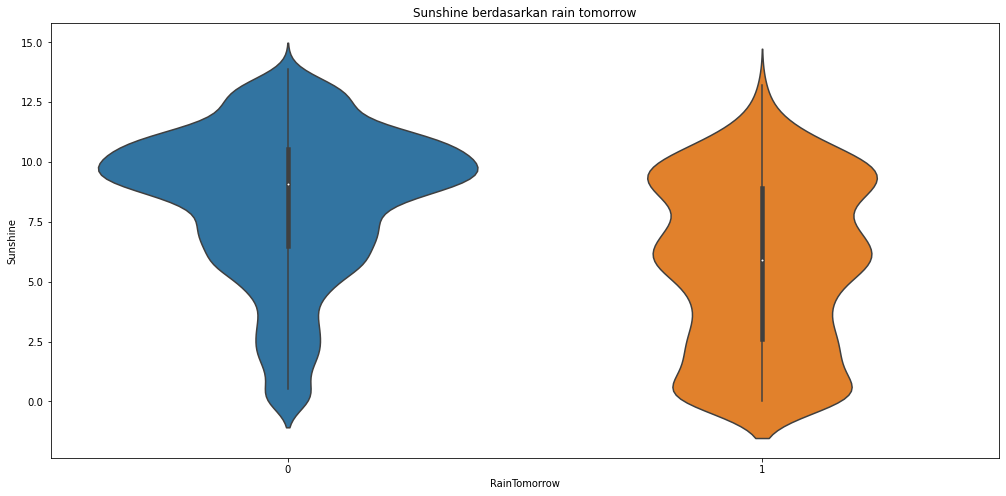

In [87]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.Sunshine,x=df.RainTomorrow)
plt.title("Sunshine berdasarkan rain tomorrow")

In [88]:
df.groupby("RainTomorrow")["Sunshine"].mean().to_frame()

,Sunshine
RainTomorrow,
0,8.371122
1,5.695128


WindGustSpeed

WindGustSpeed skew: 0.7010080252981183
WindGustSpeed kurt: 0.49180254652151234


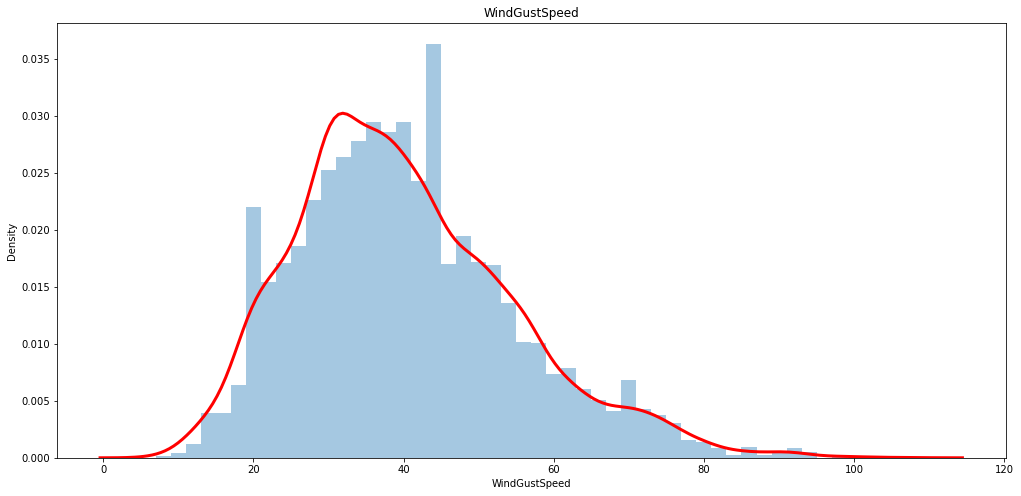

In [89]:
plt.figure(figsize=(17,8))

sns.distplot(df.WindGustSpeed,kde_kws={"linewidth":3,"color":"red"})
plt.title("WindGustSpeed")

print(f"WindGustSpeed skew: {df.WindGustSpeed.skew()}")
print(f"WindGustSpeed kurt: {df.WindGustSpeed.kurt()}")

Text(0.5, 1.0, 'WindGustSpeed berdasarkan rain tomorrow')

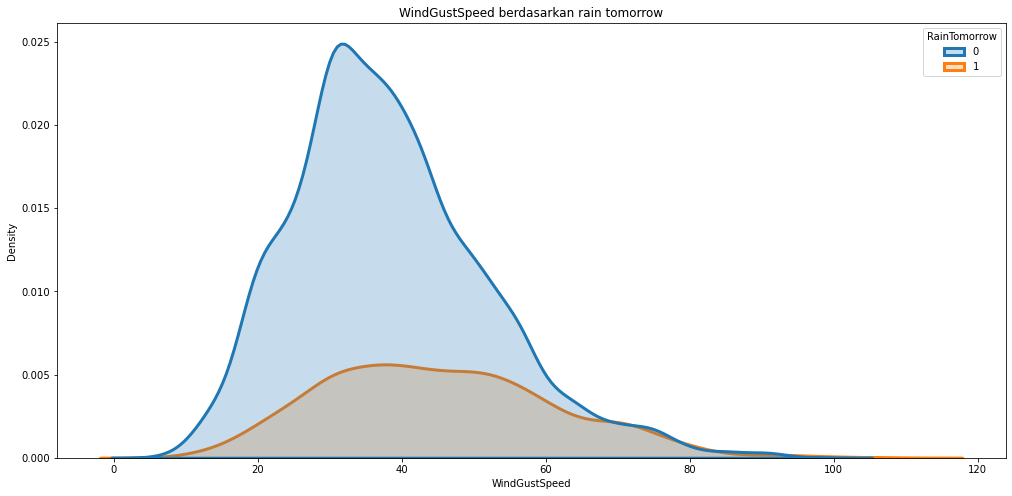

In [90]:
plt.figure(figsize=(17,8))

sns.kdeplot(df.WindGustSpeed,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("WindGustSpeed berdasarkan rain tomorrow")

Text(0.5, 1.0, 'WindGustSpeed berdasarkan rain tomorrow')

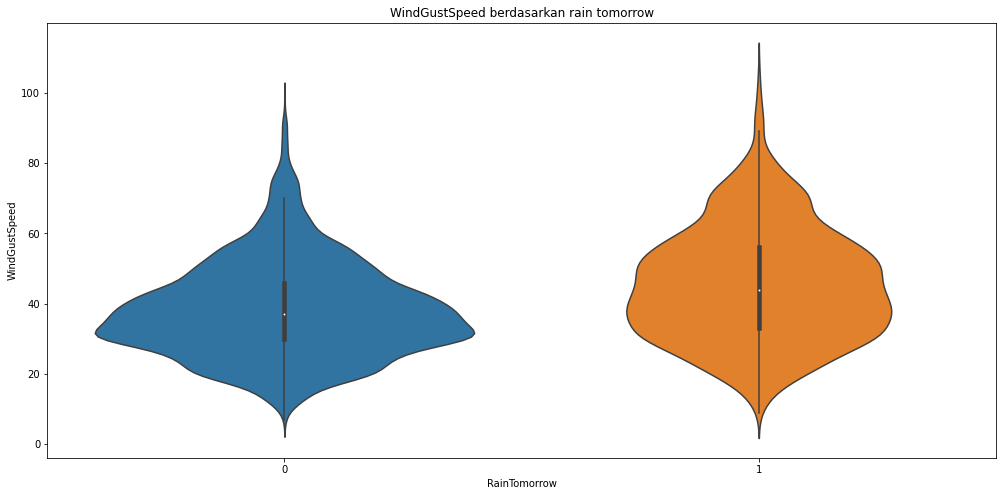

In [91]:
plt.figure(figsize=(17,8))

sns.violinplot(y=df.WindGustSpeed,x=df.RainTomorrow)
plt.title("WindGustSpeed berdasarkan rain tomorrow")

In [92]:
df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

,WindGustSpeed
RainTomorrow,
0,38.282056
1,45.482446


In [93]:
df["WindGustSpeed"] = df.groupby(["WindSpeed3pm"])["WindGustSpeed"].apply(lambda x: x.fillna(x.median())) 
df["WindGustSpeed"].fillna(method="bfill",inplace=True)

In [94]:
df.groupby("RainTomorrow")["WindGustSpeed"].mean().to_frame()

,WindGustSpeed
RainTomorrow,
0,37.565456
1,43.742341


WindSpeed3pm & WindSpeed9am

WindSpeed3pm skew: 0.5022214803208903
WindSpeed3pm kurt: 0.3555441509314563

WindSpeed9am skew: 0.9366325919718609
WindSpeed9am kurt: 0.9760990224826629


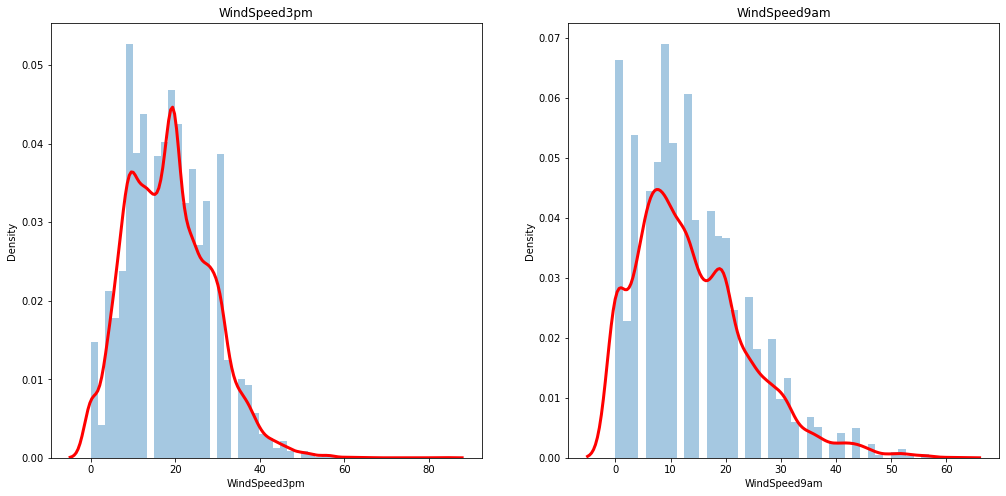

In [95]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.WindSpeed3pm,kde_kws={"linewidth":3,"color":"red"})
plt.title("WindSpeed3pm")

plt.subplot(122)
sns.distplot(df.WindSpeed9am,kde_kws={"linewidth":3,"color":"red"})
plt.title("WindSpeed9am")

print(f"WindSpeed3pm skew: {df.WindSpeed3pm.skew()}")
print(f"WindSpeed3pm kurt: {df.WindSpeed3pm.kurt()}")
print("")
print(f"WindSpeed9am skew: {df.WindSpeed9am.skew()}")
print(f"WindSpeed9am kurt: {df.WindSpeed9am.kurt()}")

Text(0.5, 1.0, 'WindSpeed9am berdasarkan rain tomorrow')

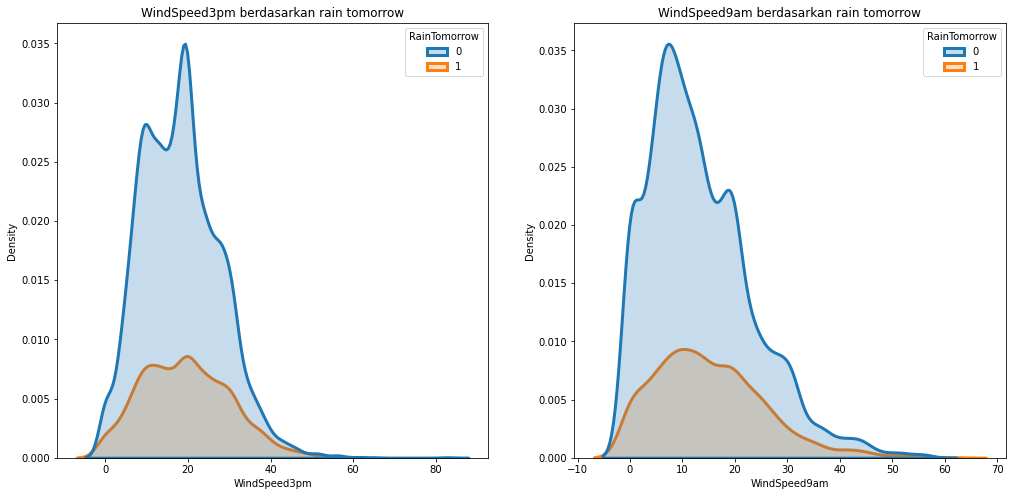

In [96]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.WindSpeed3pm,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("WindSpeed3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.WindSpeed9am,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("WindSpeed9am berdasarkan rain tomorrow")

In [97]:
df.groupby("RainTomorrow")["WindSpeed3pm","WindSpeed9am"].mean()

,WindSpeed3pm,WindSpeed9am
RainTomorrow,,
0,18.152791,13.365350
1,19.476190,15.103501


In [98]:
df["WindSpeed3pm"].fillna(method="bfill",inplace=True)
df["WindSpeed9am"].fillna(method="bfill",inplace=True)

Humidity3pm & Humidity9am

Humidity3pm skew: 0.11951533406296795
Humidity3pm kurt: -0.342337285658747

Humidity9am skew: -0.2538320791593803
Humidity9am kurt: -0.38426740148392025


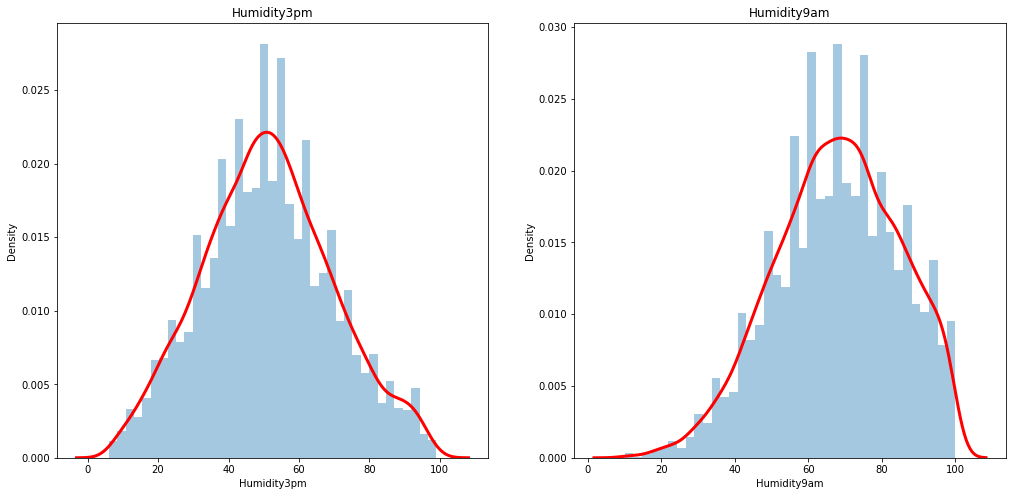

In [99]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.Humidity3pm,kde_kws={"linewidth":3,"color":"red"})
plt.title("Humidity3pm")

plt.subplot(122)
sns.distplot(df.Humidity9am,kde_kws={"linewidth":3,"color":"red"})
plt.title("Humidity9am")

print(f"Humidity3pm skew: {df.Humidity3pm.skew()}")
print(f"Humidity3pm kurt: {df.Humidity3pm.kurt()}")
print("")
print(f"Humidity9am skew: {df.Humidity9am.skew()}")
print(f"Humidity9am kurt: {df.Humidity9am.kurt()}")

Text(0.5, 1.0, 'Humidity9am berdasarkan rain tomorrow')

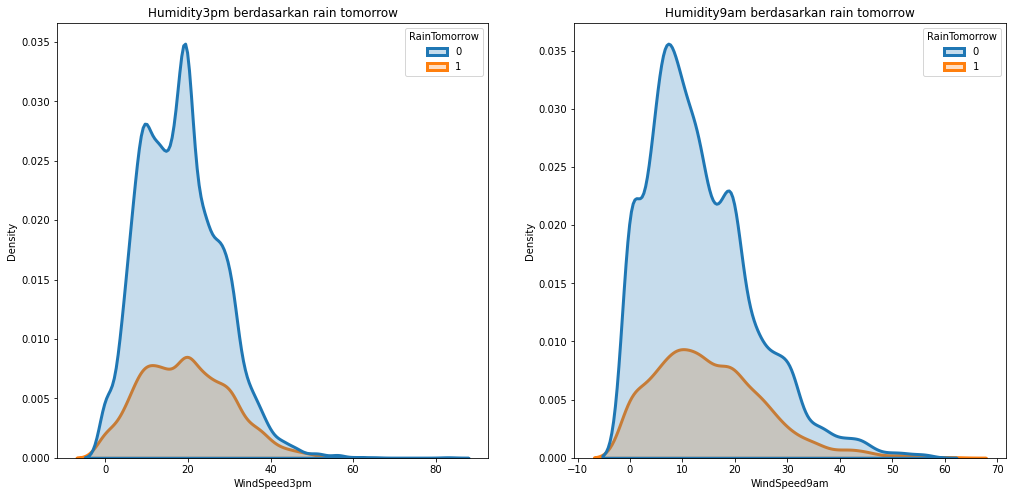

In [100]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.WindSpeed3pm,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Humidity3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.WindSpeed9am,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Humidity9am berdasarkan rain tomorrow")

Text(0.5, 1.0, 'Humidity9am berdasarkan rain tomorrow')

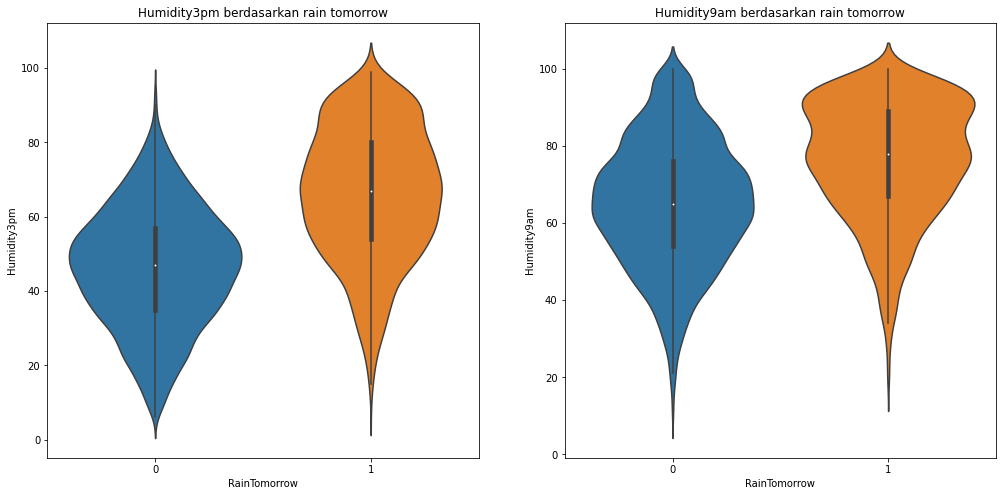

In [101]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.violinplot(y=df.Humidity3pm,x=df.RainTomorrow)
plt.title("Humidity3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.violinplot(y=df.Humidity9am,x=df.RainTomorrow)
plt.title("Humidity9am berdasarkan rain tomorrow")

In [102]:
df.groupby("RainTomorrow")["Humidity3pm","Humidity9am"].mean()

,Humidity3pm,Humidity9am
RainTomorrow,,
0,46.398695,65.076362
1,66.024835,76.070922


In [103]:
df["Humidity3pm"] = df.groupby(["Humidity9am"])["Humidity3pm"].apply(lambda x: x.fillna(x.median())) 
df["Humidity3pm"].fillna(method="bfill",inplace=True)

In [104]:
df["Humidity9am"] = df.groupby(["Humidity3pm"])["Humidity9am"].apply(lambda x: x.fillna(x.median())) 
df["Humidity9am"].fillna(method="bfill",inplace=True)

In [105]:
df.groupby("RainTomorrow")["Humidity3pm","Humidity9am"].mean()

,Humidity3pm,Humidity9am
RainTomorrow,,
0,46.444794,65.099435
1,66.024360,76.072828


Pressure3pm & Pressure9am

Pressure3pm skew: -0.01461172354859812
Pressure3pm kurt: 0.042441305921894656

Pressure9am skew: -0.029803689077504646
Pressure9am kurt: 0.04730386901989547


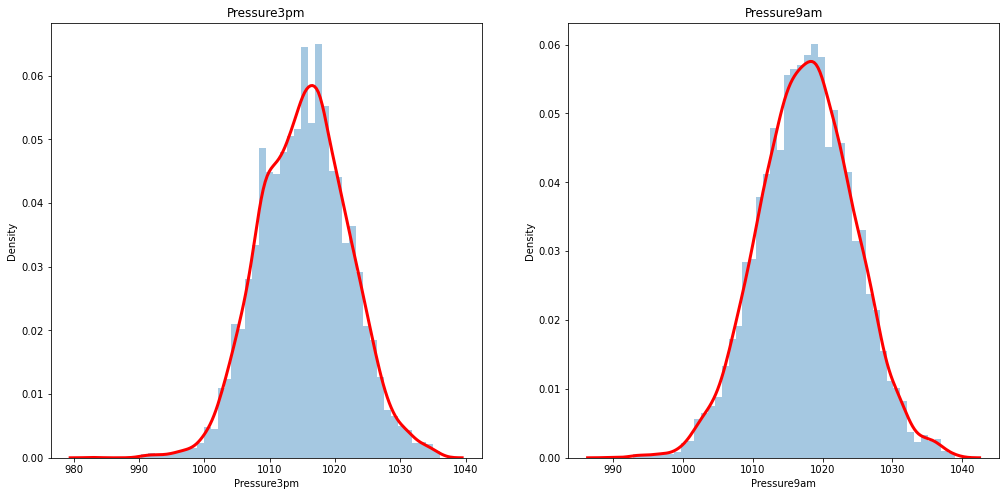

In [106]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.Pressure3pm,kde_kws={"linewidth":3,"color":"red"})
plt.title("Pressure3pm")

plt.subplot(122)
sns.distplot(df.Pressure9am,kde_kws={"linewidth":3,"color":"red"})
plt.title("Pressure9am")

print(f"Pressure3pm skew: {df.Pressure3pm.skew()}")
print(f"Pressure3pm kurt: {df.Pressure3pm.kurt()}")
print("")
print(f"Pressure9am skew: {df.Pressure9am.skew()}")
print(f"Pressure9am kurt: {df.Pressure9am.kurt()}")

Text(0.5, 1.0, 'Pressure9am berdasarkan rain tomorrow')

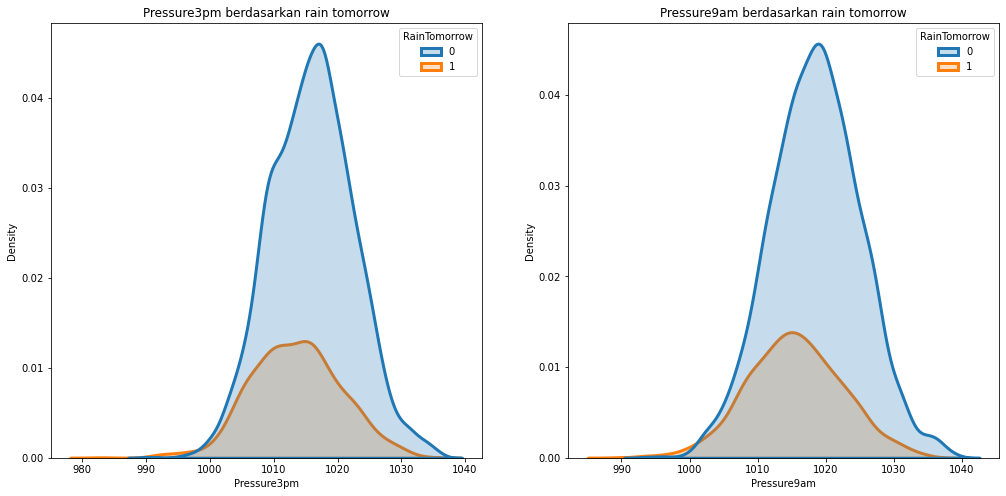

In [107]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.Pressure3pm,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Pressure3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.Pressure9am,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Pressure9am berdasarkan rain tomorrow")

In [108]:
df.groupby("RainTomorrow")["Pressure3pm","Pressure9am"].mean()

,Pressure3pm,Pressure9am
RainTomorrow,,
0,1015.903776,1018.441671
1,1013.440513,1015.443948


In [109]:
pressure = df[["Pressure3pm","Pressure9am"]].mean(axis=1)

In [110]:
pressure

0       1007.40
1       1009.20
2       1008.15
3       1015.20
4       1008.40
         ...   
8419    1022.95
8420    1022.45
8421    1021.30
8422    1018.90
8423    1017.95
Length: 8186, dtype: float64

In [111]:
pressure.isnull().sum()

1288

In [112]:
pressure.describe()

count    6898.000000
mean     1016.511003
std         6.732286
min       986.350000
25%      1011.750000
50%      1016.600000
75%      1021.037500
max      1037.300000
dtype: float64

pressure skew: -0.002905355076360517
pressure kurt: 0.032950686915885985


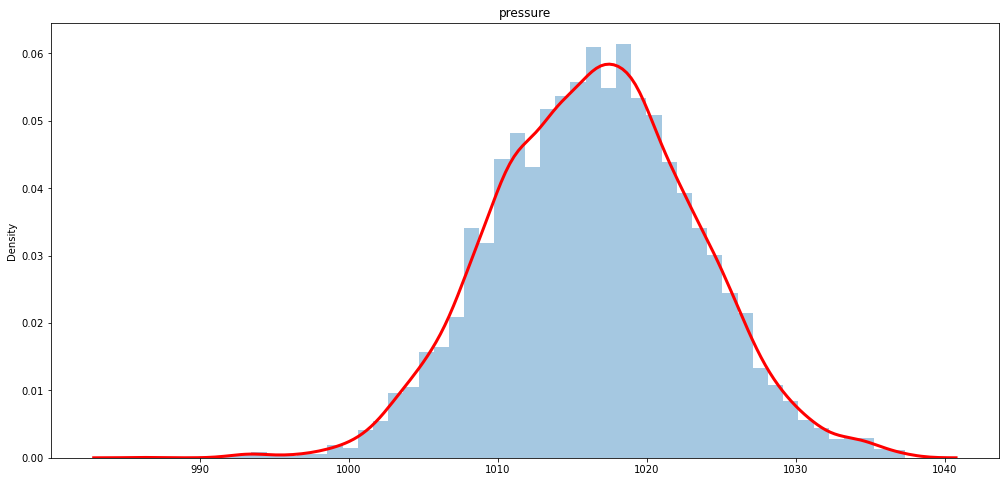

In [113]:
plt.figure(figsize=(17,8))

sns.distplot(pressure,kde_kws={"linewidth":3,"color":"red"})
plt.title("pressure")

print(f"pressure skew: {pressure.skew()}")
print(f"pressure kurt: {pressure.kurt()}")

Text(0.5, 1.0, 'pressure berdasarkan rain tomorrow')

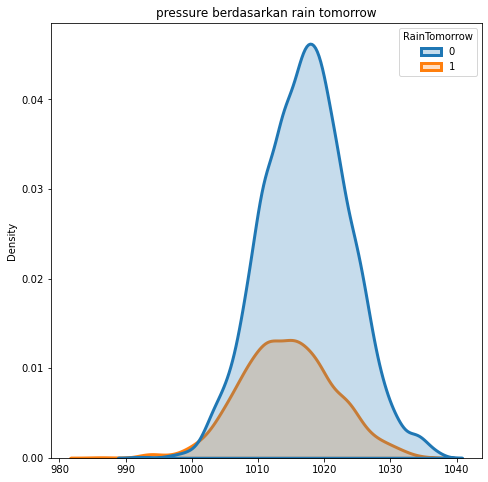

In [114]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(pressure,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("pressure berdasarkan rain tomorrow")

In [115]:
df["Pressure"] = df[["Pressure3pm","Pressure9am"]].mean(axis=1)

In [116]:
df["Pressure"] = df.groupby(["WindGustSpeed"])["Pressure"].apply(lambda x: x.fillna(x.median()))

In [117]:
df.groupby("RainTomorrow")["Pressure"].mean().to_frame()

,Pressure
RainTomorrow,
0,1017.419622
1,1015.095360


Cloud9am & Cloud3pm

Cloud3pm skew: -0.22219575665555066
Cloud3pm kurt: -1.4703009946791963

Cloud9am skew: -0.28817199176017716
Cloud9am kurt: -1.5076871003378838


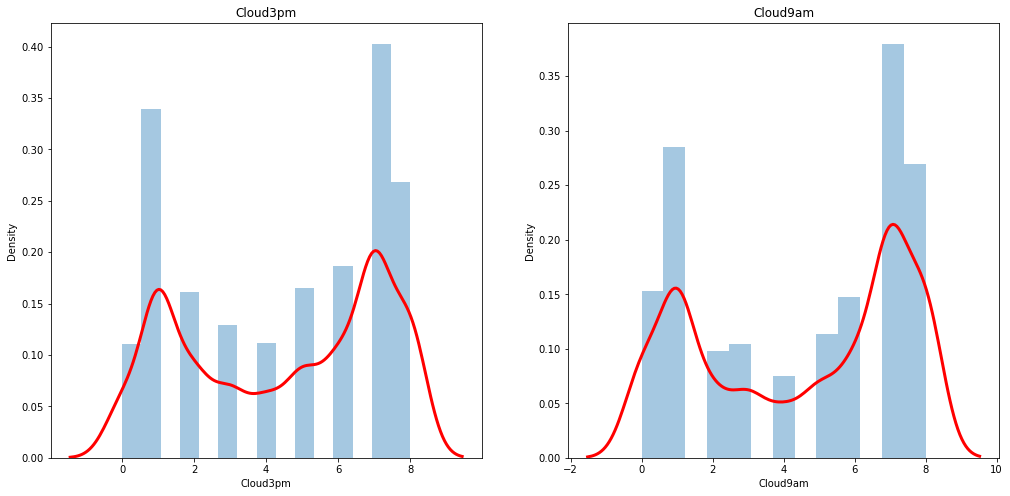

In [118]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.Cloud3pm,kde_kws={"linewidth":3,"color":"red"})
plt.title("Cloud3pm")

plt.subplot(122)
sns.distplot(df.Cloud9am,kde_kws={"linewidth":3,"color":"red"})
plt.title("Cloud9am")

print(f"Cloud3pm skew: {df.Cloud3pm.skew()}")
print(f"Cloud3pm kurt: {df.Cloud3pm.kurt()}")
print("")
print(f"Cloud9am skew: {df.Cloud9am.skew()}")
print(f"Cloud9am kurt: {df.Cloud9am.kurt()}")

Text(0.5, 1.0, 'Cloud9am berdasarkan rain tomorrow')

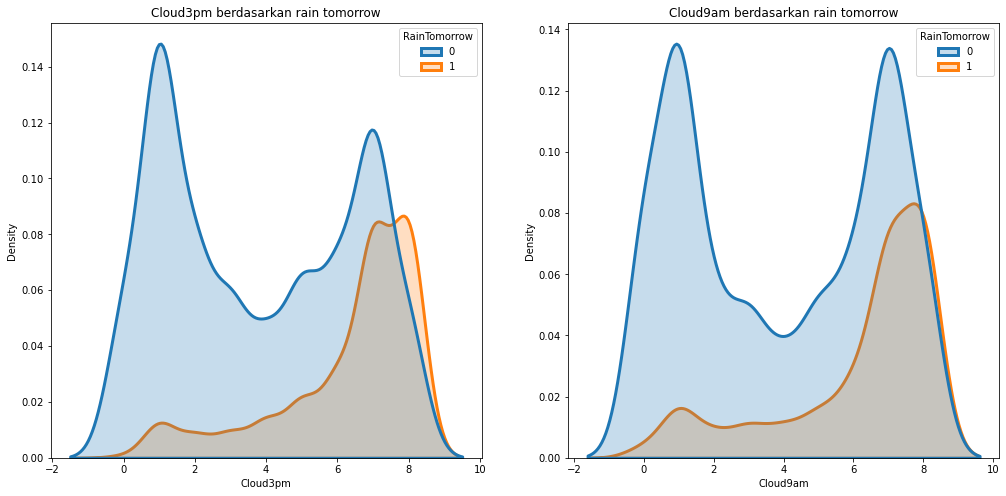

In [119]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.Cloud3pm,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Cloud3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.Cloud9am,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Cloud9am berdasarkan rain tomorrow")

In [120]:
df.groupby("RainTomorrow")["Cloud3pm","Cloud9am"].mean()

,Cloud3pm,Cloud9am
RainTomorrow,,
0,3.811900,3.953789
1,6.290038,6.114231


In [121]:
Cloud = df[["Cloud3pm","Cloud9am"]].mean(axis=1)

In [122]:
Cloud.describe()

count    6256.000000
mean        4.531570
std         2.568347
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         8.000000
dtype: float64

In [123]:
Cloud.isnull().sum()

1930

Cloud skew: -0.2692869399423908
Cloud kurt: -1.288739761544297


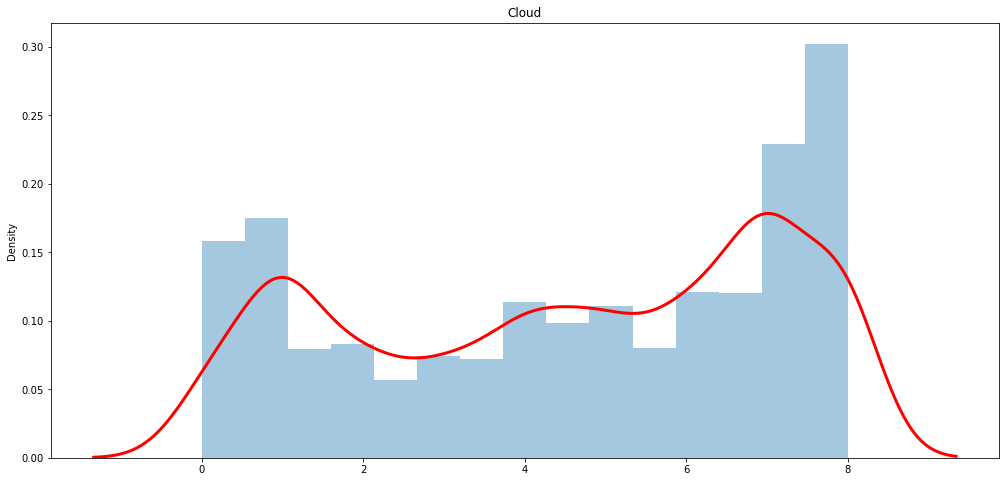

In [124]:
plt.figure(figsize=(17,8))

sns.distplot(Cloud,kde_kws={"linewidth":3,"color":"red"})
plt.title("Cloud")

print(f"Cloud skew: {Cloud.skew()}")
print(f"Cloud kurt: {Cloud.kurt()}")

Text(0.5, 1.0, 'Cloud berdasarkan rain tomorrow')

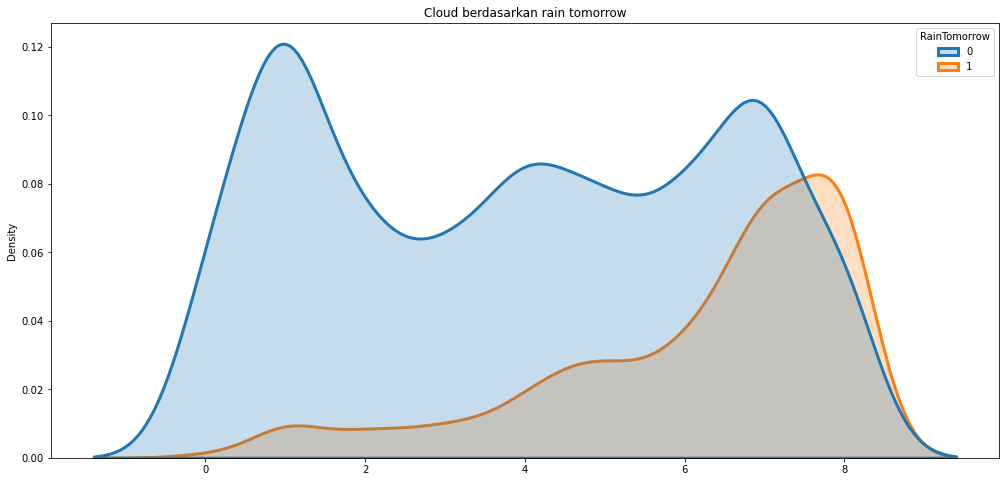

In [125]:
plt.figure(figsize=(17,8))

sns.kdeplot(Cloud,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Cloud berdasarkan rain tomorrow")

In [126]:
df["Cloud"] = df[["Cloud3pm","Cloud9am"]].mean(axis=1)

In [127]:
df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

,Cloud
RainTomorrow,
0,3.943261
1,6.165761


In [128]:
df["Cloud"] = df.groupby(["Humidity3pm"])["Cloud"].apply(lambda x: x.fillna(x.median()))

In [129]:
df.Cloud.isnull().sum()

0

In [130]:
df.groupby("RainTomorrow")["Cloud"].mean().to_frame()

,Cloud
RainTomorrow,
0,3.802906
1,5.990331


Temp3pm & Temp9am

Temp3pm skew: 0.40239517275769066
Temp3pm kurt: -0.16350460704667036

Temp9am skew: -0.008431004875121152
Temp9am kurt: -0.4407328709804741


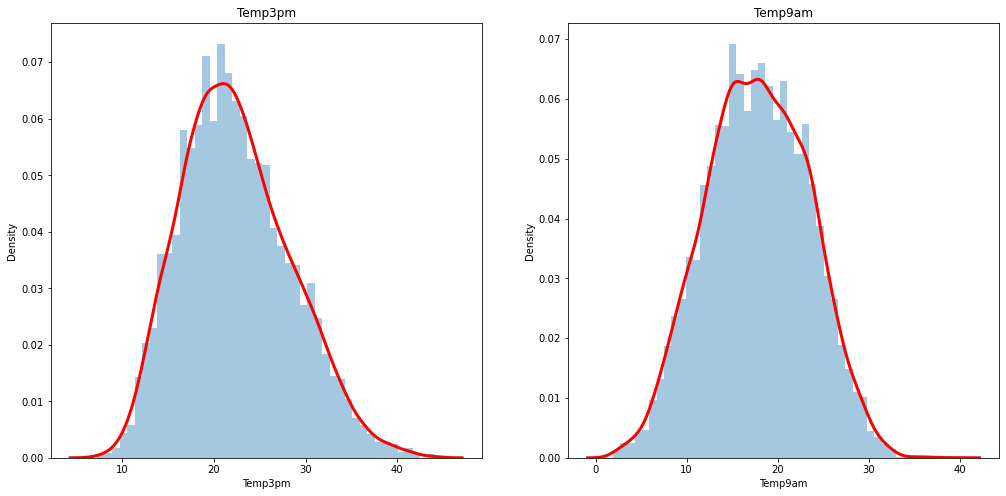

In [131]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.distplot(df.Temp3pm,kde_kws={"linewidth":3,"color":"red"})
plt.title("Temp3pm")

plt.subplot(122)
sns.distplot(df.Temp9am,kde_kws={"linewidth":3,"color":"red"})
plt.title("Temp9am")

print(f"Temp3pm skew: {df.Temp3pm.skew()}")
print(f"Temp3pm kurt: {df.Temp3pm.kurt()}")
print("")
print(f"Temp9am skew: {df.Temp9am.skew()}")
print(f"Temp9am kurt: {df.Temp9am.kurt()}")

Text(0.5, 1.0, 'Temp9am berdasarkan rain tomorrow')

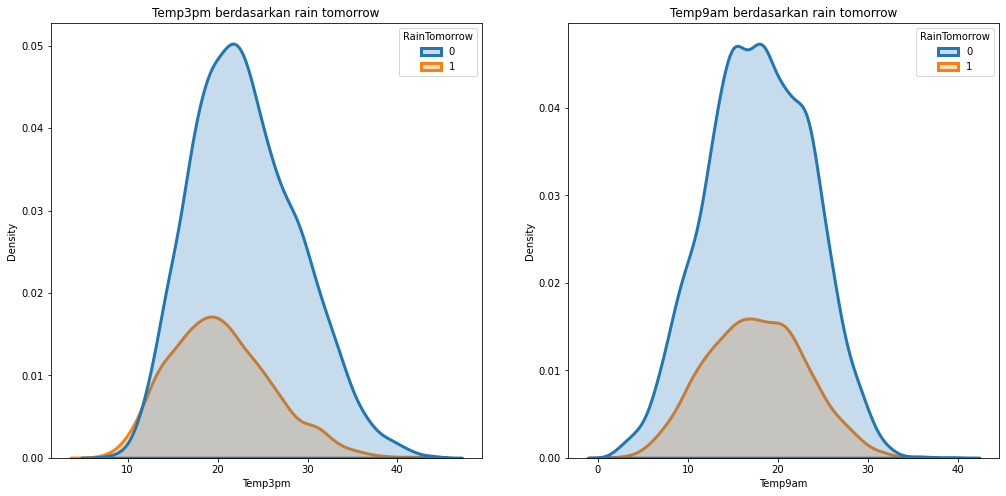

In [132]:
plt.figure(figsize=(17,8))

plt.subplot(121)
sns.kdeplot(df.Temp3pm,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Temp3pm berdasarkan rain tomorrow")

plt.subplot(122)
sns.kdeplot(df.Temp9am,hue=df.RainTomorrow,shade=True,linewidth=3)
plt.title("Temp9am berdasarkan rain tomorrow")

In [133]:
df.groupby("RainTomorrow")["Temp3pm","Temp9am"].mean()

,Temp3pm,Temp9am
RainTomorrow,,
0,23.099674,17.814992
1,20.354785,17.526127


In [134]:
df["Temp3pm"] = df.groupby(["MaxTemp"])["Temp3pm"].apply(lambda x: x.fillna(x.median())) 

In [135]:
df["Temp9am"] = df.groupby(["MinTemp"])["Temp9am"].apply(lambda x: x.fillna(x.median())) 

FINAL

In [136]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days,Pressure,Cloud
0,2008-12-01,Albury,13.4,22.9,0.6,9.40,W,44.0,W,WNW,...,16.9,21.8,No,0,2008,12,12,Monday,1007.40,8.0
1,2008-12-02,Albury,7.4,25.1,0.0,9.70,WNW,44.0,NNW,WSW,...,17.2,24.3,No,0,2008,12,12,Tuesday,1009.20,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,9.65,WSW,46.0,W,WSW,...,21.0,23.2,No,0,2008,12,12,Wednesday,1008.15,2.0
3,2008-12-04,Albury,9.2,28.0,0.0,9.30,NE,24.0,SE,E,...,18.1,26.5,No,0,2008,12,12,Thursday,1015.20,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,10.30,W,41.0,ENE,NW,...,17.8,29.7,No,0,2008,12,12,Friday,1008.40,7.5


In [137]:
usl = ["Date","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm"]
df.drop(usl,axis=1,inplace=True)

Drop all useless data

In [138]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow,Pressure,Cloud
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8166.000000,8186.000000
mean,13.145877,23.863945,2.765820,7.720266,39.067799,13.758490,18.414610,67.768385,51.206939,17.745224,22.443355,0.243220,1016.853784,4.334932
std,5.416106,6.107903,10.421426,3.398372,14.841823,10.169447,9.823854,16.812941,18.367023,5.621639,5.946251,0.429053,6.355285,2.435111
min,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,1.900000,7.300000,0.000000,986.350000,0.000000
25%,9.125000,19.300000,0.000000,5.700000,28.000000,6.000000,11.000000,56.000000,39.000000,13.800000,18.100000,0.000000,1012.600000,2.000000
50%,13.200000,23.300000,0.000000,8.625000,37.000000,13.000000,19.000000,68.000000,51.000000,17.700000,21.900000,0.000000,1017.400000,4.500000
75%,17.300000,28.000000,0.800000,10.200000,48.000000,20.000000,24.000000,80.000000,63.000000,21.900000,26.400000,0.000000,1021.050000,6.500000
max,28.500000,45.500000,371.000000,13.900000,107.000000,61.000000,83.000000,100.000000,99.000000,39.400000,44.100000,1.000000,1037.300000,8.000000


descriptive all numerical feature

In [139]:
df.describe(exclude="number")

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Years,Months,date,Days
count,8186,7233,7377,7900,8186,8186,8186,8186,8186
unique,12,16,16,16,2,10,12,12,7
top,Melbourne,N,N,SE,No,2010,6,6,Sunday
freq,1502,689,869,797,6227,1436,800,800,1191


In [140]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Months,date,Days,Pressure,Cloud
3134,Williamtown,6.7,17.8,2.9,5.55,WSW,26.0,WNW,ESE,17.0,...,12.0,17.0,Yes,0,2016,8,8,Saturday,1022.2,3.0
1436,CoffsHarbour,5.0,17.7,0.0,10.70,WSW,35.0,WSW,ENE,19.0,...,14.8,17.6,No,0,2010,8,8,Saturday,1017.5,0.0
2765,Penrith,6.2,17.1,0.0,7.20,SW,22.0,SSW,ESE,11.0,...,11.8,16.3,No,0,2015,7,7,Sunday,1019.7,3.0
5186,Melbourne,9.5,16.7,0.0,7.30,SSE,31.0,SW,S,7.0,...,12.0,15.9,No,0,2011,9,9,Thursday,1026.2,5.0
3114,Williamtown,8.7,17.2,4.8,6.80,W,30.0,NW,SE,15.0,...,10.0,15.7,Yes,0,2016,8,8,Sunday,1026.3,6.0
3185,Williamtown,16.1,22.3,0.0,2.20,WNW,56.0,WSW,W,2.0,...,19.1,13.0,No,1,2016,10,10,Monday,1008.2,8.0
7096,PerthAirport,10.7,20.6,0.0,7.20,NNE,52.0,NNE,NE,31.0,...,13.4,19.6,No,0,2011,6,6,Friday,1023.8,4.5
5759,Melbourne,21.5,28.2,2.4,1.00,NNE,67.0,N,NNE,35.0,...,25.4,23.1,Yes,1,2010,12,12,Tuesday,1006.8,7.0
3805,Williamtown,18.7,27.1,0.0,11.80,SE,33.0,S,ESE,9.0,...,24.1,26.4,No,0,2016,2,2,Sunday,1017.7,4.0
7596,PerthAirport,15.4,20.6,2.8,3.80,WSW,46.0,ENE,WSW,7.0,...,16.0,19.2,Yes,0,2012,10,10,Monday,1013.7,7.5


In [141]:
print(df.isnull().any().sum())
print(df.duplicated().sum())
print(df.shape)

4
1562
(8186, 23)
